In [2]:
#Cell 1 - Import Libraries & Setup Directories

import sys
import os

# Append the project root (one level up) to sys.path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Define directories for figures, text, and processed data
figures_dir = "../reports/figures"
text_dir = "../reports/text"
processed_dir = "../data/processed"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(text_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Now import our data preprocessing functions
from src.data_preprocessing import preprocess_data


In [ ]:
#Cell 2 - Preprocess Data Using Module
# Use the preprocess_data function from our module to load, impute missing values, and remove outliers

raw_data_path = '../data/raw/train.csv'
cleaned_df = preprocess_data(raw_data_path, outlier_column="SalePrice")
print("Cleaned data loaded. Shape:", cleaned_df.shape)

# (Optional) Save cleaned data – module may already do this; you can double-check:
cleaned_data_path = os.path.join(processed_dir, "train_cleaned.csv")
cleaned_df.to_csv(cleaned_data_path, index=False)
print("Cleaned data saved to:", cleaned_data_path)

Cleaned data loaded. Shape: (1399, 81)
Cleaned data saved to: ../data/processed/train_cleaned.csv


In [4]:
#Cell 3 - Missing Values Summary Post-Cleaning

missing_after = cleaned_df.isnull().sum().sort_values(ascending=False)
missing_summary = pd.DataFrame({
    'Missing Values': missing_after,
    'Percentage': (missing_after / len(cleaned_df)) * 100
})
print("Missing values after cleaning:")
display(missing_summary[missing_summary['Missing Values'] > 0])

# Save the missing values summary to text (CSV format)
missing_clean_path = os.path.join(text_dir, "missing_values_post_cleaning.csv")
missing_summary[missing_summary['Missing Values'] > 0].to_csv(missing_clean_path)


Missing values after cleaning:


,Missing Values,Percentage


In [5]:
#%#Cell 4 - Summary Statistics of Cleaned Data

summary_clean = cleaned_df.describe()
display(summary_clean)

# Save summary statistics to text folder
summary_clean_path = os.path.join(text_dir, "describe_cleaned.csv")
summary_clean.to_csv(summary_clean_path)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,...,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,733.508935,57.487491,69.047891,10155.280915,5.983560,5.591137,1970.080772,1984.058613,89.725518,417.333095,...,89.621158,44.892066,22.378127,3.231594,14.634024,2.482487,45.385275,6.312366,2007.819871,170237.127234
std,422.811873,42.803603,21.522816,8324.834198,1.282272,1.118236,30.009463,20.661160,159.219858,428.401771,...,121.798431,65.718951,61.454480,28.563071,54.752105,38.289681,506.746349,2.703584,1.327762,59230.130817
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.500000,20.000000,60.000000,7442.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,69.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,...,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.500000,70.000000,78.000000,11316.500000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,...,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203500.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,340000.000000


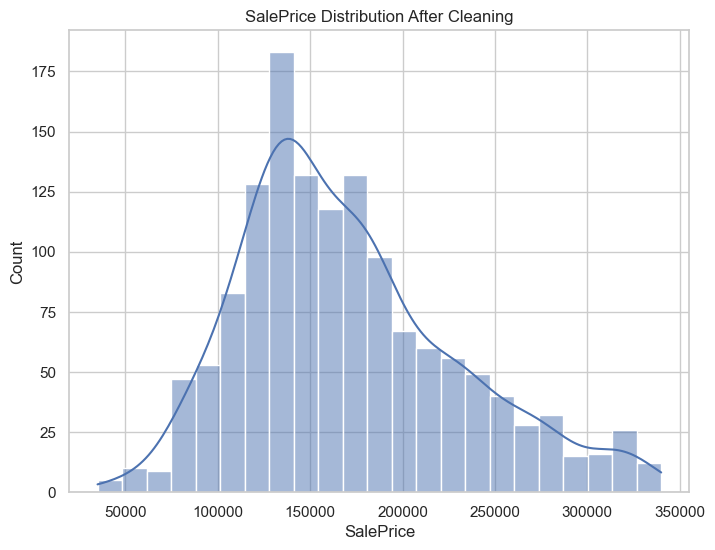

In [6]:
#Cell 5 - Visualize SalePrice Distribution (Cleaned Data)

plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['SalePrice'], kde=True)
plt.title("SalePrice Distribution After Cleaning")

saleprice_fig_path = os.path.join(figures_dir, "SalePrice_after_cleaning.png")
plt.savefig(saleprice_fig_path, dpi=300, bbox_inches='tight')
plt.show()
